## Standard & Poor's 500 and Dow Jones Industrial Average Index Comparisons

<i> Project by: Dawn, Sophia, Wee Kiam, Zu

The Standard & Poor's 500 (SP 500):
The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States.

Dow Jones Industrial Average Index (DJI):
The Dow Jones Industrial Average, Dow Jones, or simply the Dow, is a price-weighted measurement stock market index of the 30 prominent companies listed on stock exchanges in the United States.

Our data is collected using the Yahoo Finance API. 

In this notebook, we look into the monthly annualized volatility of the closing price of these indexes and how they can impact decision-making for traders.

In [1]:
# importing needed libraries/modules
import numpy as np 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from statsmodels.formula.api import ols 
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest

### Using Yahoo Finance API to pull data into DataFrames

In [2]:
SP500_Ticker= yf.Ticker('^GSPC')

In [3]:
tickerSP500 = SP500_Ticker.history(period='1d', start='1992-1-2', end='2021-6-14')

In [4]:
print(tickerSP500)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1992-01-02   417.029999   417.269989   411.040009   417.260010   207570000   
1992-01-03   417.269989   419.790009   416.160004   419.339996   224270000   
1992-01-06   419.309998   419.440002   416.920013   417.959991   251210000   
1992-01-07   417.959991   417.959991   415.200012   417.399994   252780000   
1992-01-08   417.359985   420.230011   415.019989   418.100006   290750000   
...                 ...          ...          ...          ...         ...   
2021-06-07  4229.339844  4232.339844  4215.660156  4226.520020  3835570000   
2021-06-08  4233.810059  4236.740234  4208.410156  4227.259766  3943870000   
2021-06-09  4232.990234  4237.089844  4218.740234  4219.549805  3902870000   
2021-06-10  4228.560059  4249.740234  4220.339844  4239.180176  3502480000   
2021-06-11  4242.899902  4248.379883  4232.250000  4247.439941  

In [5]:
DJI_Ticker = yf.Ticker('^DJI')

In [6]:
tickerDJI = DJI_Ticker.history(period='1d', start='1992-1-2', end='2021-6-14')

In [7]:
print(tickerDJI)

                    Open          High           Low         Close     Volume  \
Date                                                                            
1992-01-02   3152.100098   3172.629883   3139.310059   3172.399902   23550000   
1992-01-03   3172.399902   3210.639893   3165.919922   3201.500000   23620000   
1992-01-06   3201.500000   3213.330078   3191.860107   3200.100098   27280000   
1992-01-07   3200.100098   3210.199951   3184.479980   3204.800049   25510000   
1992-01-08   3204.800049   3229.199951   3185.820068   3203.899902   29040000   
...                  ...           ...           ...           ...        ...   
2021-06-07  34766.199219  34820.910156  34574.511719  34630.238281  259120000   
2021-06-08  34645.839844  34665.378906  34452.941406  34599.820312  289440000   
2021-06-09  34626.160156  34654.671875  34439.371094  34447.140625  245100000   
2021-06-10  34502.511719  34737.789062  34447.250000  34466.238281  309310000   
2021-06-11  34499.808594  34

In [8]:
tickerDJI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7417 entries, 1992-01-02 to 2021-06-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          7417 non-null   float64
 1   High          7417 non-null   float64
 2   Low           7417 non-null   float64
 3   Close         7417 non-null   float64
 4   Volume        7417 non-null   int64  
 5   Dividends     7417 non-null   int64  
 6   Stock Splits  7417 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 463.6 KB


In [9]:
tickerDJI = tickerDJI.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1)

In [10]:
tickerDJI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7417 entries, 1992-01-02 to 2021-06-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   7417 non-null   float64
dtypes: float64(1)
memory usage: 115.9 KB


In [11]:
tickerSP500 = tickerSP500.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1)

### Calculating Daily Returns (%) of Closing Price for S&P500 and DJI

In [12]:
#To model returns we will use daily % change
daily_ret_SP500 = tickerSP500['Close'].pct_change()
#drop the 1st value - nan
daily_ret_SP500.dropna(inplace=True)
#daily %change
daily_ret_SP500.head()

Date
1992-01-03    0.004985
1992-01-06   -0.003291
1992-01-07   -0.001340
1992-01-08    0.001677
1992-01-09   -0.001172
Name: Close, dtype: float64

In [13]:
#To model returns we will use daily % change
daily_ret_DJI = tickerDJI['Close'].pct_change()
#drop the 1st value - nan
daily_ret_DJI.dropna(inplace=True)
#daily %change
daily_ret_DJI.head()

Date
1992-01-03    0.009173
1992-01-06   -0.000437
1992-01-07    0.001469
1992-01-08   -0.000281
1992-01-09    0.001748
Name: Close, dtype: float64

In [14]:
#resize charts to fit screen if using Jupyter Notebook
plt.rcParams['figure.figsize']=[15,5]

### Plotting Monthly Annualized Volatility for S&P500 and DJI

#### Volatility often refers to the amount of uncertainty or risk related to the size of changes in a security's value. A higher volatility means that a security's value can potentially be spread out over a larger range of values. This means that the price of the security can change dramatically over a short time period in either direction. A lower volatility means that a security's value does not fluctuate dramatically, and tends to be more steady. Hence, we have opted to analyze the volatility of the S&P500 and DJI indexes to gain some insights.

##### We first resample the daily returns into monthly frequency, then we convert that into monthly volatility by calculating standard deviation. Finally, we annualize the figure by multiplying by the square root of 12 (because there are 12 months in a year). They are then plotted into our chart.

##### We also calculated the final average monthly volatility ranking over the time period of the samples.

Date
1992-01-31    0.026666
1992-02-29    0.023972
1992-03-31    0.017382
1992-04-30    0.029597
1992-05-31    0.020011
Freq: M, Name: Close, dtype: float64


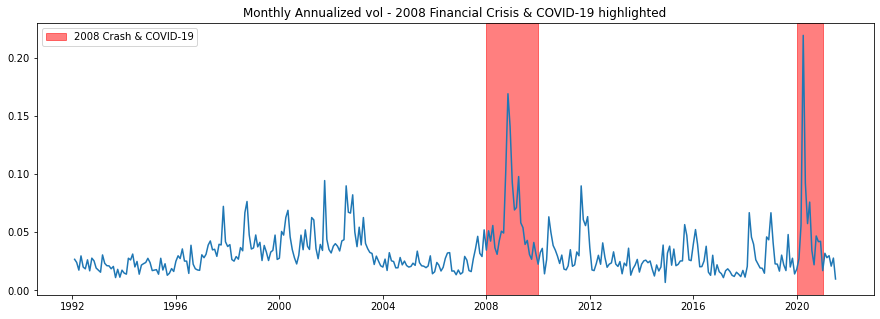

In [15]:
#use pandas to resample returns per month and take Standard Dev as measure of Volatility
#then annualize by multiplying by sqrt of number of periods (12)
mnthly_annu_DJI = daily_ret_DJI.resample('M').std()* np.sqrt(12)

print(mnthly_annu_DJI.head())
#we can see major market events show up in the volatility
plt.plot(mnthly_annu_DJI)
plt.axvspan('2008','2010',color='r',alpha=.5)
plt.axvspan('2020','2021',color='r',alpha=.5)
plt.title('Monthly Annualized vol - 2008 Financial Crisis & COVID-19 highlighted')
labs = mpatches.Patch(color='red',alpha=.5, label="2008 Crash & COVID-19")
plt.legend(handles=[labs])

In [16]:
mnthly_annu_DJI = daily_ret_DJI.resample('M').std()* np.sqrt(12)
print(mnthly_annu_DJI.head())

Date
1992-01-31    0.026666
1992-02-29    0.023972
1992-03-31    0.017382
1992-04-30    0.029597
1992-05-31    0.020011
Freq: M, Name: Close, dtype: float64


In [17]:
#for each year rank each month based on volatility lowest=1 Highest=12
ranked_DJI = mnthly_annu_DJI.groupby(mnthly_annu_DJI.index.year).rank()

#average the ranks over all years for each month
final_DJI = ranked_DJI.groupby(ranked_DJI.index.month).mean()

final_DJI.describe()

count    12.000000
mean      6.444253
std       0.675007
min       5.413793
25%       5.965517
50%       6.560920
75%       6.783333
max       7.466667
Name: Close, dtype: float64

In [18]:
#for each year rank each month based on volatility lowest=1 Highest=12
ranked_DJI = mnthly_annu_DJI.groupby(mnthly_annu_DJI.index.year).rank()

#average the ranks over all years for each month
final_DJI = ranked_DJI.groupby(ranked_DJI.index.month).mean()

final_DJI.describe()

count    12.000000
mean      6.444253
std       0.675007
min       5.413793
25%       5.965517
50%       6.560920
75%       6.783333
max       7.466667
Name: Close, dtype: float64

In [19]:
final_DJI

Date
1     6.666667
2     6.733333
3     7.466667
4     6.933333
5     6.466667
6     6.133333
7     5.965517
8     5.413793
9     6.655172
10    7.448276
11    5.965517
12    5.482759
Name: Close, dtype: float64

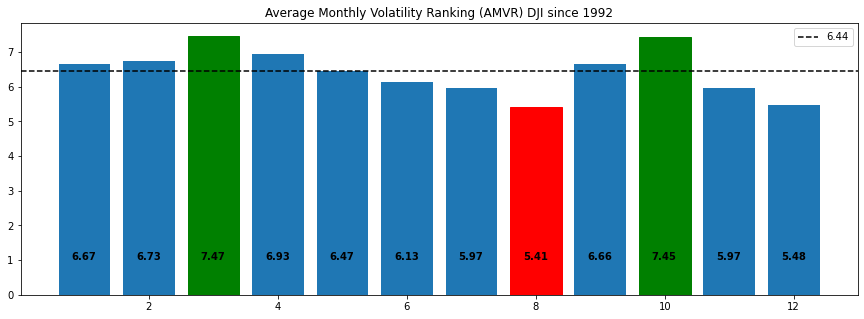

In [20]:
#plot results for ranked DJI volatility
#clearly October has the highest AMVR
#and December has the lowest
#mean of 6.45 is plotted

b_plot = plt.bar(x=final_DJI.index,height=final_DJI)
b_plot[2].set_color('g')
b_plot[7].set_color('r')
b_plot[9].set_color('g')
for i,v in enumerate(round(final_DJI,2)):
    plt.text(i+.8,1,str(v), color='black', fontweight='bold')
plt.axhline(final_DJI.mean(),ls='--',color='k',label=round(final_DJI.mean(),2))
plt.title('Average Monthly Volatility Ranking (AMVR) DJI since 1992')

plt.legend()
plt.show()

In [21]:
daily_ret_SP500= tickerSP500['Close'].pct_change()
daily_ret_SP500.dropna(inplace=True)
daily_ret_SP500.head()

Date
1992-01-03    0.004985
1992-01-06   -0.003291
1992-01-07   -0.001340
1992-01-08    0.001677
1992-01-09   -0.001172
Name: Close, dtype: float64

Date
1992-01-31    0.022622
1992-02-29    0.024620
1992-03-31    0.016001
1992-04-30    0.031184
1992-05-31    0.020875
Freq: M, Name: Close, dtype: float64


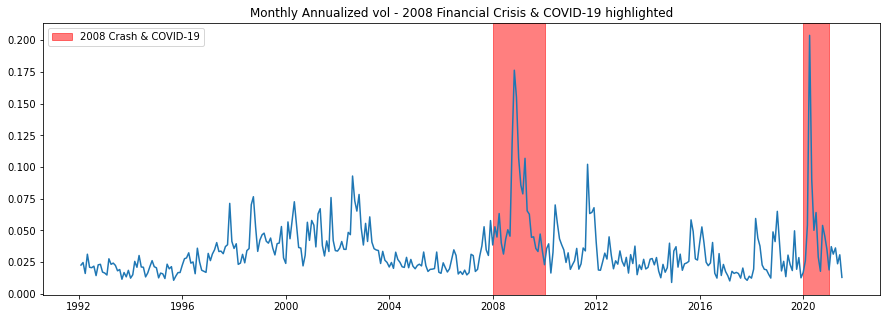

In [22]:
#use pandas to resample returns per month and take Standard Dev as measure of Volatility
#then annualize by multiplying by sqrt of number of periods (12)
mnthly_annu_SP500 = daily_ret_SP500.resample('M').std()* np.sqrt(12)

print(mnthly_annu_SP500.head())
#we can see major market events show up in the volatility
plt.plot(mnthly_annu_SP500)
plt.axvspan('2008','2010',color='r',alpha=.5)
plt.axvspan('2020','2021',color='r',alpha=.5)
plt.title('Monthly Annualized vol - 2008 Financial Crisis & COVID-19 highlighted')
labs = mpatches.Patch(color='red',alpha=.5, label="2008 Crash & COVID-19")
plt.legend(handles=[labs])

In [23]:
#for each year rank each month based on volatility lowest=1 Highest=12
ranked_SP500 = mnthly_annu_SP500.groupby(mnthly_annu_SP500.index.year).rank()

#average the ranks over all years for each month
final_SP500 = ranked_SP500.groupby(ranked_SP500.index.month).mean()

final_SP500.describe()

count    12.000000
mean      6.444636
std       0.666843
min       5.344828
25%       5.965517
50%       6.558621
75%       6.850000
max       7.620690
Name: Close, dtype: float64

In [24]:
final_SP500

Date
1     6.600000
2     6.800000
3     7.100000
4     7.000000
5     6.766667
6     6.000000
7     6.068966
8     5.655172
9     6.517241
10    7.620690
11    5.862069
12    5.344828
Name: Close, dtype: float64

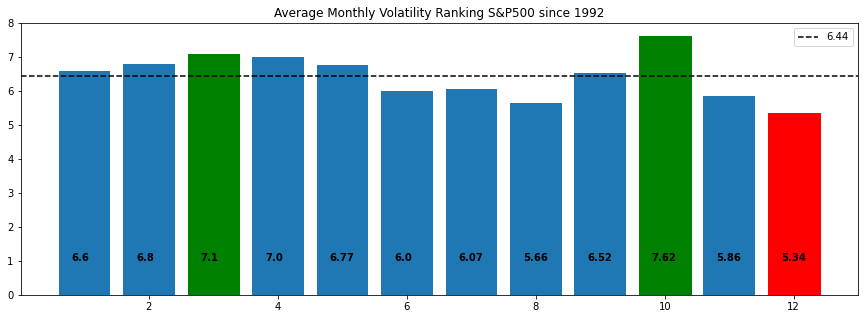

In [25]:
#plot results for ranked s&p 500 volatility
#clearly October has the highest AMVR
#and December has the lowest
#mean of 6.45 is plotted

b_plot = plt.bar(x=final_SP500.index,height=final_SP500)
b_plot[2].set_color('g')
b_plot[9].set_color('g')
b_plot[11].set_color('r')
for i,v in enumerate(round(final_SP500,2)):
    plt.text(i+.8,1,str(v), color='black', fontweight='bold')
plt.axhline(final_SP500.mean(),ls='--',color='k',label=round(final_SP500.mean(),2))
plt.title('Average Monthly Volatility Ranking S&P500 since 1992')

plt.legend()
plt.show()

### Normality Test for S&P500 and DJI Closing Price

In [26]:
# Function for D'Agostino's K^2 Normality Test
def AgostinoNormalityTest(input): 
    stat, p = normaltest(input)         ## D'Agostino's K^2 Normality Test

    print('stat=%.2f, p=%.2f' % (stat, p))
    if p > 0.05:
        print('Approximately Normally Distributed')
    else:
        print('Not Approximately Normally Distributed')
    sns.distplot(input,fit=stats.invgamma,kde=True)  

/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


stat=0.35, p=0.84
Approximately Normally Distributed


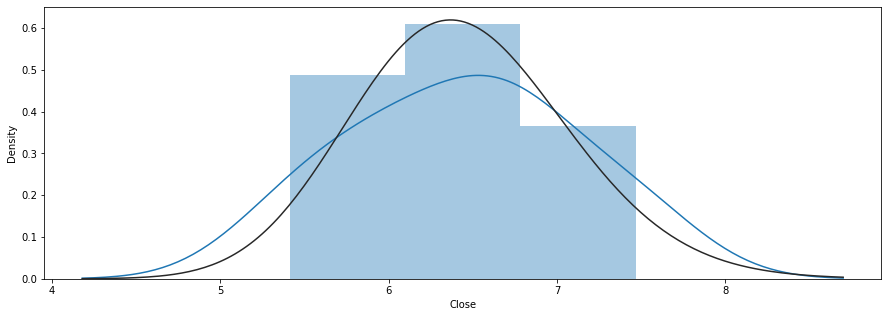

In [27]:
AgostinoNormalityTest(final_DJI)

/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


stat=0.19, p=0.91
Approximately Normally Distributed


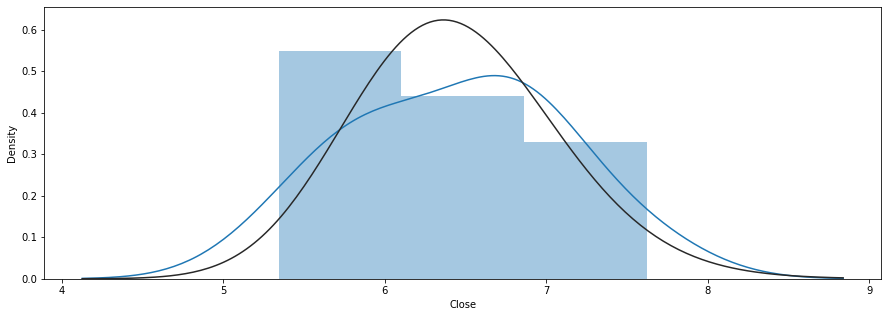

In [28]:
AgostinoNormalityTest(final_SP500)

We note that the S&P500 and DJI AMVR are approximately normally distributed. 

Hence, we can proceed to do parametric testing on this data to check for correlation and also to check on their distribution

### <i> We run a Pearson's R test to check for correlation between the two 
$\begin{align}
  & {{H}_{0}}:\ \end{align}$ DJI and S&P 500 distributions are not correlated

$\begin{align} {{H}_{1}}:\,\end{align}$ DJI and S&P 500 distributions are correlated

In [29]:
(test_statistic, p_value) = stats.pearsonr(final_SP500, final_DJI)

print ("The test statistic is: ", test_statistic)
print("The p-value is: ", p_value)

if p_value < 0.05:
    print('We will reject Ho, hence the two distribution are correlated.')
else:
    print('We fail to reject Ho, hence the two distributions not are correlated')

The test statistic is:  0.9593784374339689
The p-value is:  8.135818751614669e-07
We will reject Ho, hence the two distribution are correlated.


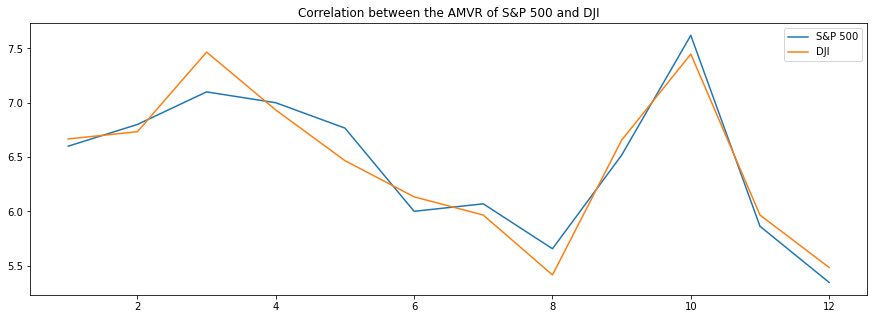

In [30]:
plt.plot(final_SP500)
plt.plot(final_DJI)
plt.legend (["S&P 500", "DJI"])
plt.title("Correlation between the AMVR of S&P 500 and DJI")
plt.show()

#### <i> Let us  form the hypothesis, given that the two distributions are highly correlated:

$\begin{align}
  & {{H}_{0}}:\, D= 0 \end{align}$ 
    
The difference, D between DJI and S&P 500 is approximately 0
 <br><br>   
$\begin{align} {{H}_{1}}:\, D \ { \neq } \ 0 \end{align}$
    
The difference, D between DJI and S&P 500 is significantly different

In [31]:
# Paired t-test
(test_statistic, p_value) = stats.ttest_rel(final_SP500,final_DJI)
print ("The test statistic is: ", test_statistic)
print("The p-value is: ", p_value)

if p_value > 0.05:
    print('Subject(s) is likely the same distribution')
else:
    print('Subject(s) is likely different distributions')

The test statistic is:  0.006934184337445704
The p-value is:  0.99459152555245
Subject(s) is likely the same distribution


Since p-value of 0.9945 is > 0.05, we fail to reject the null hypothesis and conclude
the difference D is equal to 0 or in other words not much differences.
We can conclude that there were no significant differences in values of AMVR for DJI and S&P 500 

In [32]:
# Unpaired t-test

from scipy.stats import ttest_ind
ttest_ind(final_SP500,final_DJI)
print ("The test statistic is: ", test_statistic)
print("The p-value is: ", p_value)

if p_value > 0.05:
    print('Subject(s) is likely the same distribution')
else:
    print('Subject(s) is likely different distributions')

The test statistic is:  0.006934184337445704
The p-value is:  0.99459152555245
Subject(s) is likely the same distribution


Since p-value of 0.9945 is > 0.05, we fail to reject the null hypothesis and conclude the difference D is equal to 0 or in other words not much differences. We can conclude that there were no significant differences in values of AMVR for DJI and S&P 500